#    Prediction of Remaining Useful Life (RUL) of turbofan engine
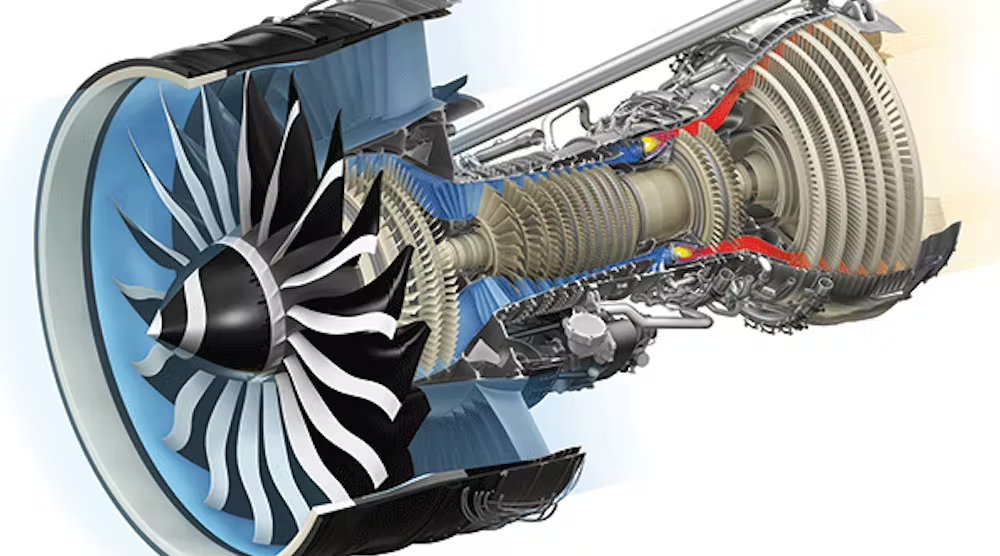

This capstone project will demonstrate how machine learning (ML) can be used to predict the Remaining Useful Life (RUL) of turbofan engines. The main objective of this project is to develop an ML predictive model that can predict how many time steps remain until the engine fails based on sensor information describing the engine's present and past performance.  By using the proposed ML model, an engine operator could direct maintenance toward engines at risk of failure, which will improve the maintenance routine's efficiency and, most importantly, increases reliability.









#   Dataset Description 

In this project, the "Turbofan Engine Degradation Simulation Data Set" from NASA   will be used.
The NASA dataset contains simulation data on engine degradation generated by C-MAPSS (Commercial Modular Aero-Propulsion System Simulation). A total of four sets of simulations were conducted under a variety of operating conditions and fault modes as showm in Table 1 .

The engine is operating normally at the start of each time series, and develops a fault at some point during the series.
The fault grows in magnitude until the system fails in the training set. In the test set, the time series ends before the system fails. 



The dataset  contains the following information:



-  Engine unit number
- Time, in cycles
- Three operational settings
- 21 sensor readings

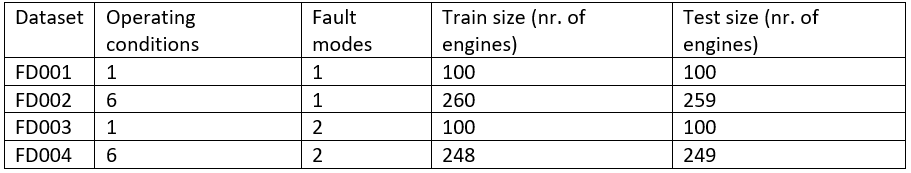
                                      Table I: Overview of turbofan datasets


# Exploratory Data Analysis(EDA)

 importing the required libraries

In [1]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pd.set_option('display.max_columns', None)

print("Pandas version: ", pd.__version__)
print("Numpy version: ", np.__version__)
print("Scikit-learn version: ", sklearn.__version__)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/home/safsaf/anaconda3/envs/py/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Pandas version:  1.5.2
Numpy version:  1.23.4
Scikit-learn version:  1.1.3


In [2]:

# Identify column names to make indexing easier

index_name=["unit_number","cycles"]
operational_setting =["setting_1","setting_2","setting_3"]
sensor=["s_{}".format(i+1) for i in range(0,21)]

col_names = index_name + operational_setting + sensor

# read data

train = pd.read_csv(r"/mnt/c/Users/safsa/Desktop/Fourth_Brain/MLE_project/Project/data/train_FD001.txt", sep = "\s+", header = None,index_col=False,names=col_names)

test = pd.read_csv(r"/mnt/c/Users/safsa/Desktop/Fourth_Brain/MLE_project/Project/data/test_FD001.txt", sep = "\s+", header = None,index_col=False,names=col_names)

y_test = pd.read_csv(r"/mnt/c/Users/safsa/Desktop/Fourth_Brain/MLE_project/Project/data/RUL_FD001.txt", sep = "\s+", header = None,names=['RUL'])








To verify that the data was imported correctly and for a general overview of the data set, a basic diagnostic analysis is preformed :

In [3]:

train.shape

(20631, 26)

In [4]:
train.head()

unit_number  cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0            1       1    -0.0007    -0.0004      100.0  518.67  641.82   
1            1       2     0.0019    -0.0003      100.0  518.67  642.15   
2            1       3    -0.0043     0.0003      100.0  518.67  642.35   
3            1       4     0.0007     0.0000      100.0  518.67  642.35   
4            1       5    -0.0019    -0.0002      100.0  518.67  642.37   

       s_3      s_4    s_5    s_6     s_7      s_8      s_9  s_10   s_11  \
0  1589.70  1400.60  14.62  21.61  554.36  2388.06  9046.19   1.3  47.47   
1  1591.82  1403.14  14.62  21.61  553.75  2388.04  9044.07   1.3  47.49   
2  1587.99  1404.20  14.62  21.61  554.26  2388.08  9052.94   1.3  47.27   
3  1582.79  1401.87  14.62  21.61  554.45  2388.11  9049.48   1.3  47.13   
4  1582.85  1406.22  14.62  21.61  554.00  2388.06  9055.15   1.3  47.28   

     s_12     s_13     s_14    s_15  s_16  s_17  s_18   s_19   s_20     s_21  
0  521.66  2388.02  8138.62  8.4195  0.03   392  2388  100.0  39.06  23.4190  
1  522.28  2388.07  8131.49  8.4318  0.03   392  2388  100.0  39.00  23.4236  
2  522.42  2388.03  8133.23  8.4178  0.03   390  2388  100.0  38.95  23.3442  
3  522.86  2388.08  8133.83  8.3682  0.03   392  2388  100.0  38.88  23.3739  
4  522.19  2388.04  8133.80  8.4294  0.03   393  2388  100.0  38.90  23.4044

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_number  20631 non-null  int64  
 1   cycles       20631 non-null  int64  
 2   setting_1    20631 non-null  float64
 3   setting_2    20631 non-null  float64
 4   setting_3    20631 non-null  float64
 5   s_1          20631 non-null  float64
 6   s_2          20631 non-null  float64
 7   s_3          20631 non-null  float64
 8   s_4          20631 non-null  float64
 9   s_5          20631 non-null  float64
 10  s_6          20631 non-null  float64
 11  s_7          20631 non-null  float64
 12  s_8          20631 non-null  float64
 13  s_9          20631 non-null  float64
 14  s_10         20631 non-null  float64
 15  s_11         20631 non-null  float64
 16  s_12         20631 non-null  float64
 17  s_13         20631 non-null  float64
 18  s_14         20631 non-null  float64
 19  s_15

In [6]:
train['unit_number'].nunique()

100

 
Based on the unique method, we can conclude that FD001 contains 100 engines.Next  the pandas describe function is used to gain an understanding of  the average number of cycles the engines ran before breaking down. 



In [7]:
train[index_name].groupby('unit_number').max().describe()

cycles
count  100.000000
mean   206.310000
std     46.342749
min    128.000000
25%    177.000000
50%    199.000000
75%    229.250000
max    362.000000


By examining the max and min of (cycles), you can see that the engine that failed the earliest failed after 128 cycles, while the engine that lasted the longest failed after 362 cycles. In general, engines break between 199 and 206 cycles on average. it is worth noting that the standard deviation of 46 cycles is quite high. A visual representation will be provided further down in order to gain a better understanding of the engines cycles .


## Sensors 

In [8]:
train.loc[:,'s_1':].describe().transpose()

count         mean           std        min        25%        50%  \
s_1   20631.0   518.670000  0.000000e+00   518.6700   518.6700   518.6700   
s_2   20631.0   642.680934  5.000533e-01   641.2100   642.3250   642.6400   
s_3   20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600  1590.1000   
s_4   20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600  1408.0400   
s_5   20631.0    14.620000  1.776400e-15    14.6200    14.6200    14.6200   
s_6   20631.0    21.609803  1.388985e-03    21.6000    21.6100    21.6100   
s_7   20631.0   553.367711  8.850923e-01   549.8500   552.8100   553.4400   
s_8   20631.0  2388.096652  7.098548e-02  2387.9000  2388.0500  2388.0900   
s_9   20631.0  9065.242941  2.208288e+01  9021.7300  9053.1000  9060.6600   
s_10  20631.0     1.300000  0.000000e+00     1.3000     1.3000     1.3000   
s_11  20631.0    47.541168  2.670874e-01    46.8500    47.3500    47.5100   
s_12  20631.0   521.413470  7.375534e-01   518.6900   520.9600   521.4800   
s_13  20631.0  2388.096152  7.191892e-02  2387.8800  2388.0400  2388.0900   
s_14  20631.0  8143.752722  1.907618e+01  8099.9400  8133.2450  8140.5400   
s_15  20631.0     8.442146  3.750504e-02     8.3249     8.4149     8.4389   
s_16  20631.0     0.030000  1.387812e-17     0.0300     0.0300     0.0300   
s_17  20631.0   393.210654  1.548763e+00   388.0000   392.0000   393.0000   
s_18  20631.0  2388.000000  0.000000e+00  2388.0000  2388.0000  2388.0000   
s_19  20631.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
s_20  20631.0    38.816271  1.807464e-01    38.1400    38.7000    38.8300   
s_21  20631.0    23.289705  1.082509e-01    22.8942    23.2218    23.2979   

            75%        max  
s_1    518.6700   518.6700  
s_2    643.0000   644.5300  
s_3   1594.3800  1616.9100  
s_4   1414.5550  1441.4900  
s_5     14.6200    14.6200  
s_6     21.6100    21.6100  
s_7    554.0100   556.0600  
s_8   2388.1400  2388.5600  
s_9   9069.4200  9244.5900  
s_10     1.3000     1.3000  
s_11    47.7000    48.5300  
s_12   521.9500   523.3800  
s_13  2388.1400  2388.5600  
s_14  8148.3100  8293.7200  
s_15     8.4656     8.5848  
s_16     0.0300     0.0300  
s_17   394.0000   400.0000  
s_18  2388.0000  2388.0000  
s_19   100.0000   100.0000  
s_20    38.9500    39.4300  
s_21    23.3668    23.6184

Based on the standard deviation obtained from the describe function of the sensor data, the following can be concluded:  
- s1, s10, s18, and  s19 are not fluctuating at all, so they can be discarded since no information is contained in them 
- s5,s16,26  show little fluctuation 
- s9 and s14 fluctuate the most  

  

## Calculating the RUL 

Calculating RUL is important because it serves two important purposes: 


1. When plotting sensor signals, it will be  used as an X-axis variable to enable easy interpretation of changes in the sensor signals as the engines approach failure.

2. It is the target variable in supervised machine learning 

Since we do not have any information about engines' RUL in the training set, we must make our own estimates. Our assumption is that the RUL decreases linearly over time and reaches 0 at the end of the engine's lifecycle. According to this assumption, RUL at 10 cycles just before breakdown would be 10, and 50 at 50 cycles just before breakdown, etc

The  RUL can be calculated mathematically using max_cycle - cycles. The dataframe will be grouped by unit_number before computing max__cycle in order to account for the max_cycle of each engine. To make the calculation of the RUL easier, max_ cycle is merged back into the dataframe, and the RUL is calculated by subtracting cycles from max_cycle  (max_cycle — cycles). Max_cycle is then dropped since it is no longer needed


In [9]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_number")
    max_cycle = grouped_by_unit["cycles"].max()
    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_number', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["cycles"]
    result_frame["RUL"] = remaining_useful_life
    
    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame
  
train = add_remaining_useful_life(train)
train[index_name+['RUL']].head()

unit_number  cycles  RUL
0            1       1  191
1            1       2  190
2            1       3  189
3            1       4  188
4            1       5  187

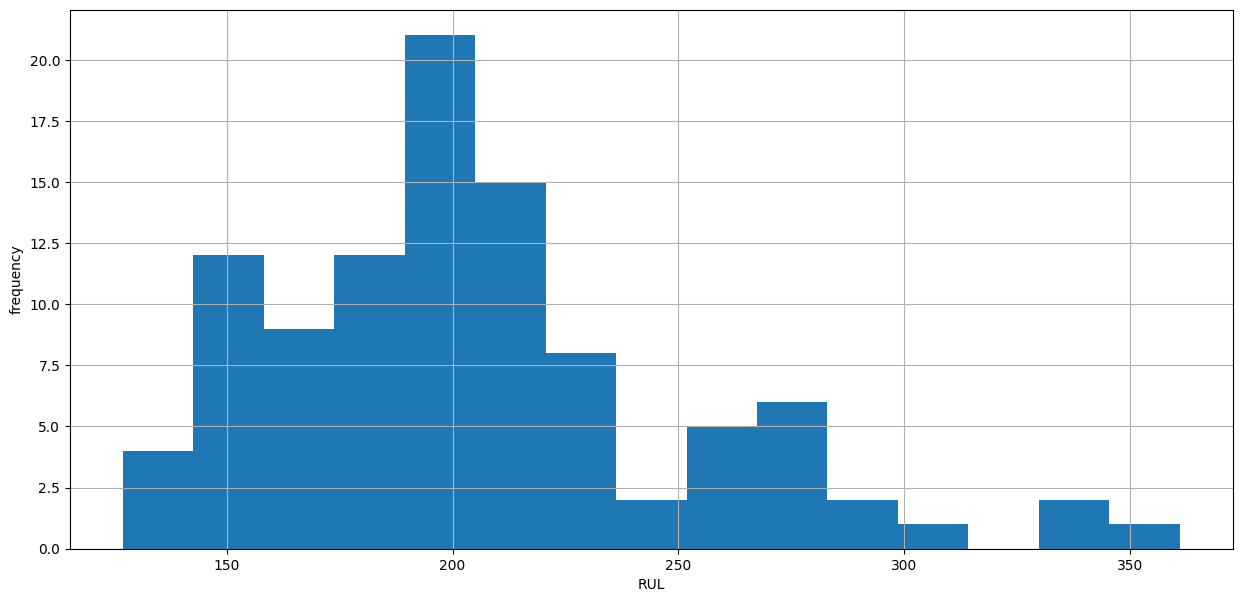

In [10]:
df_max_rul = train[['unit_number', 'RUL']].groupby('unit_number').max().reset_index()
df_max_rul['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

From the histogram, we can conclude that most engines break down around 200 cycles which coincides  with the result that was obtained form the descriptive statistics

# Visualising sensor signals

Below is the code used to plot the signals of each sensor (21 sensors). The X-axis is reverted so that RUL decreases along the axis where zero indicates engine failure. 



In [11]:
def plot_sensor(sensor_name):
    plt.figure(figsize=(13,5))
    for i in train['unit_number'].unique():
        #if (i % 10 == 0):  # only plot every 10th unit_number 
        plt.plot('RUL', sensor_name, 
                     data=train[train['unit_number']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Useful Life (RUL)')
    plt.show()

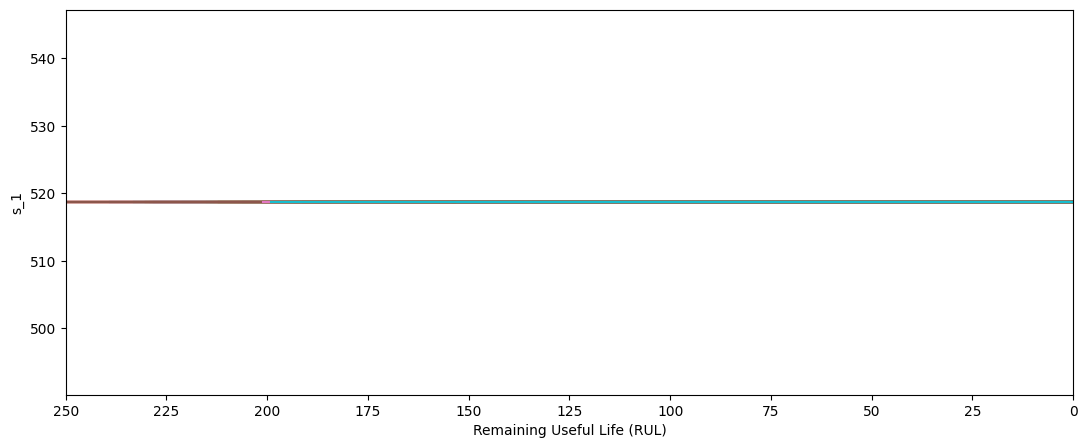

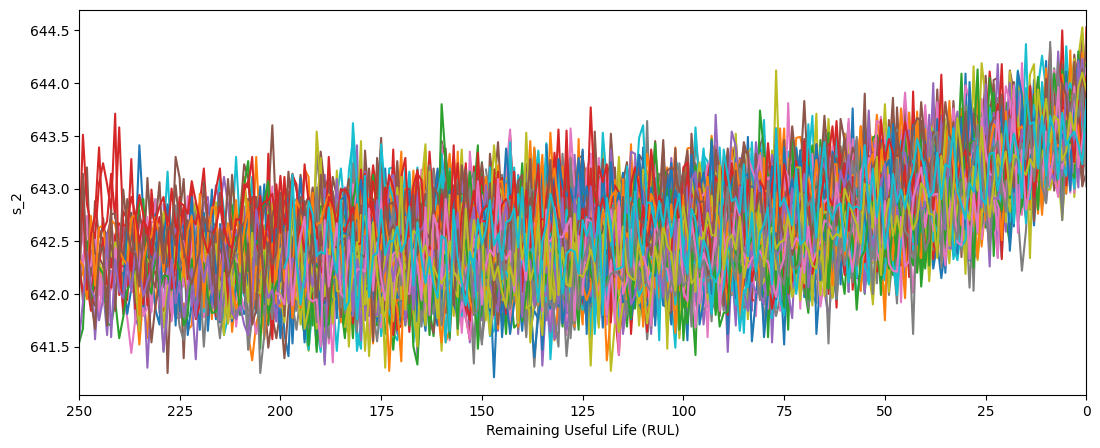

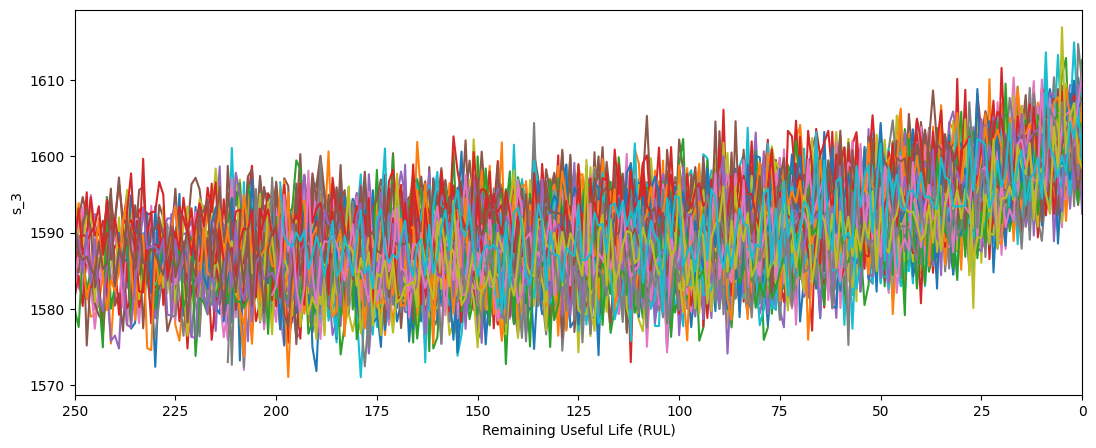

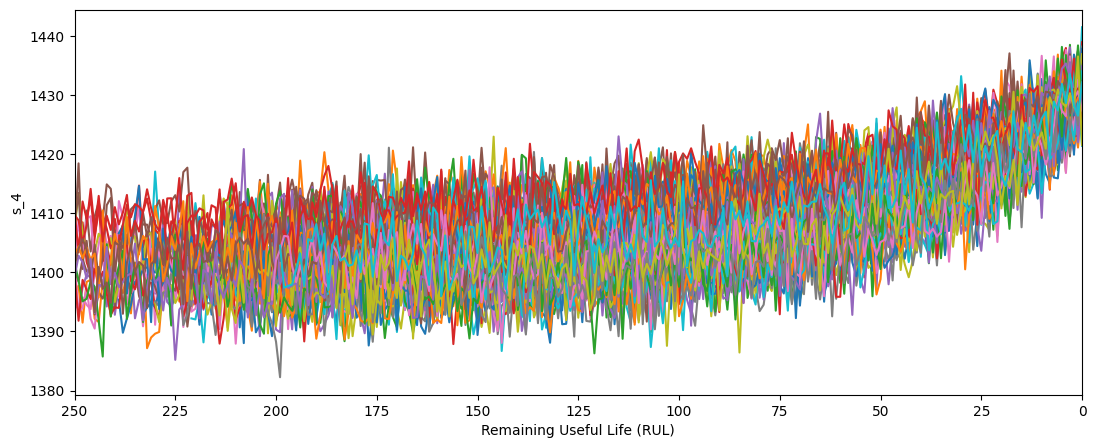

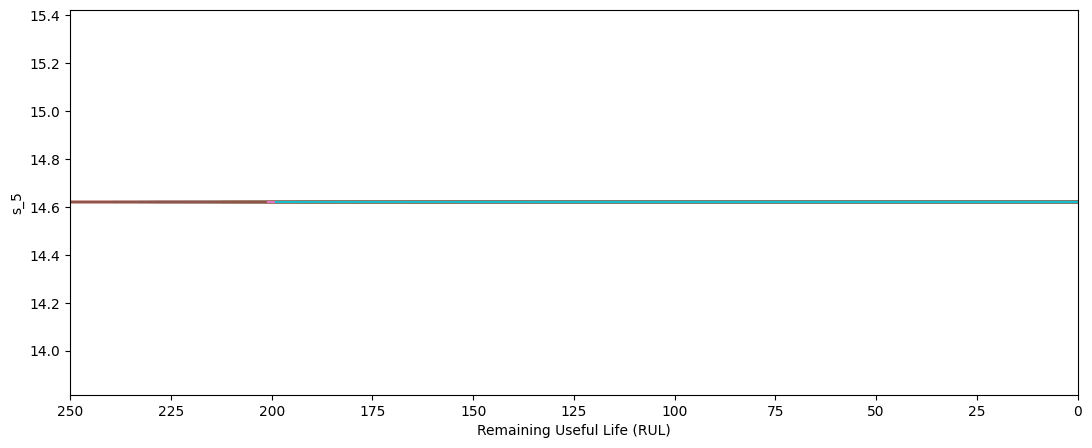

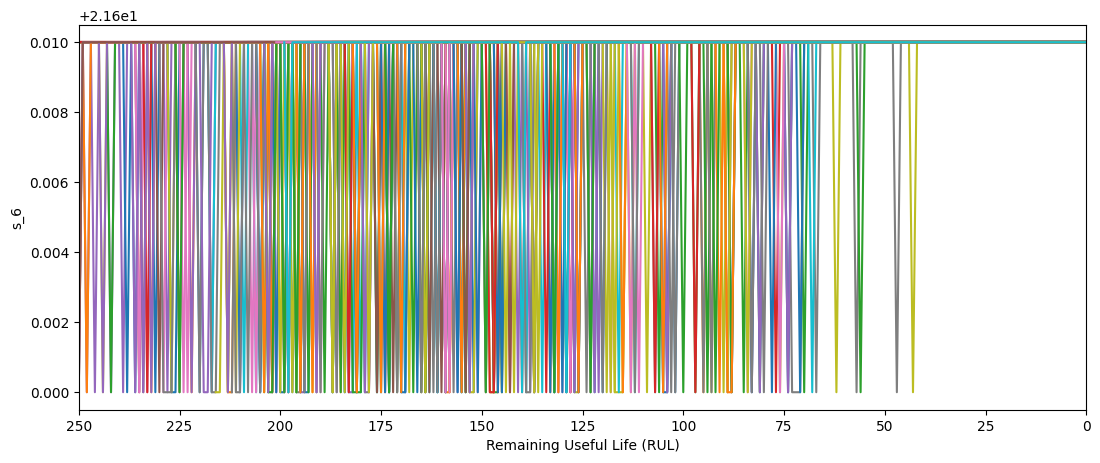

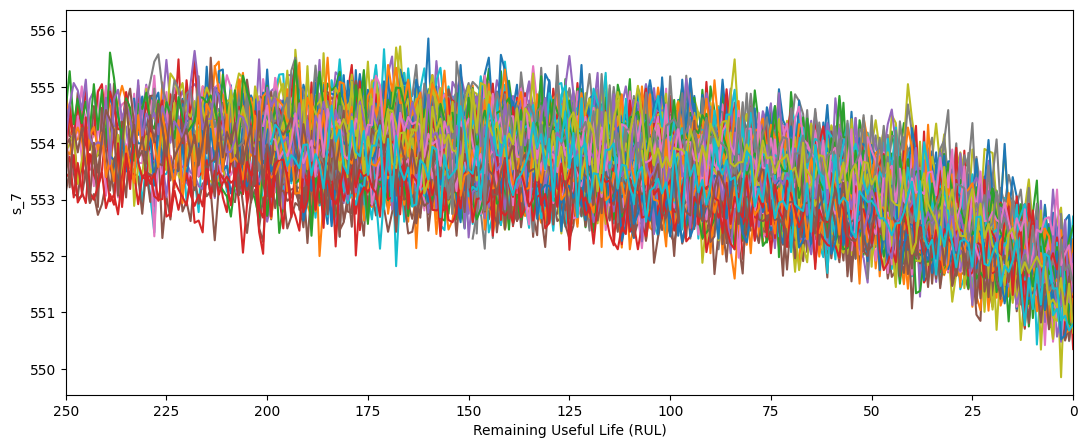

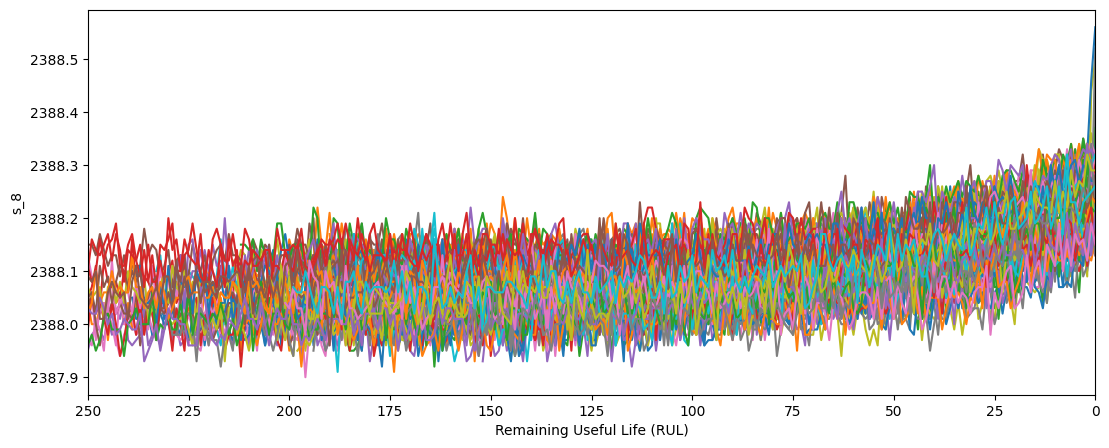

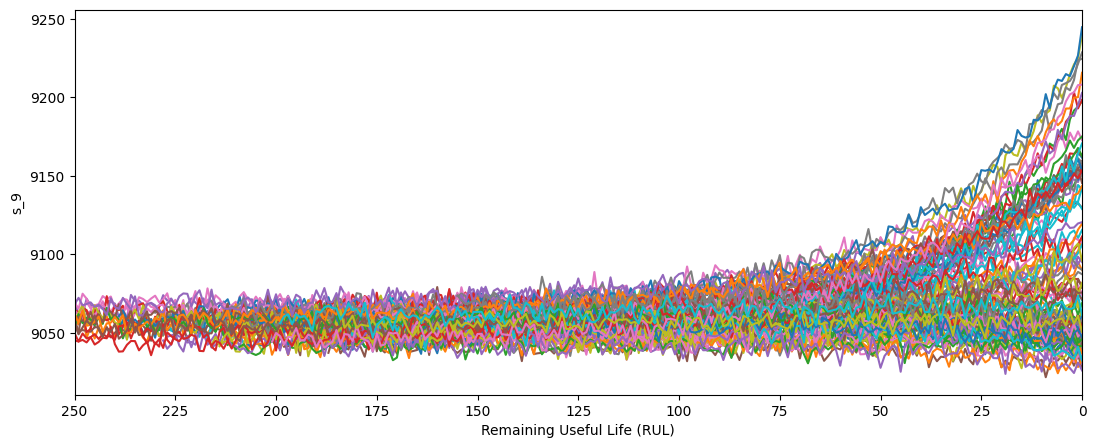

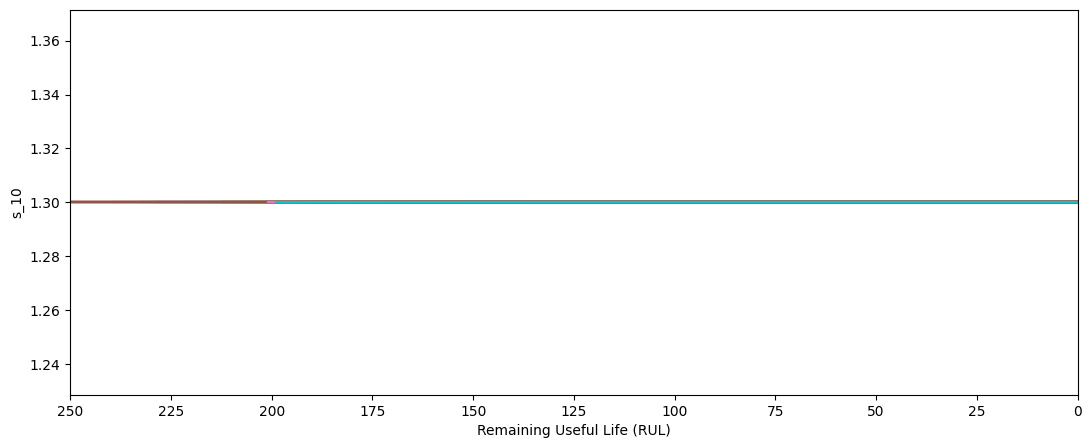

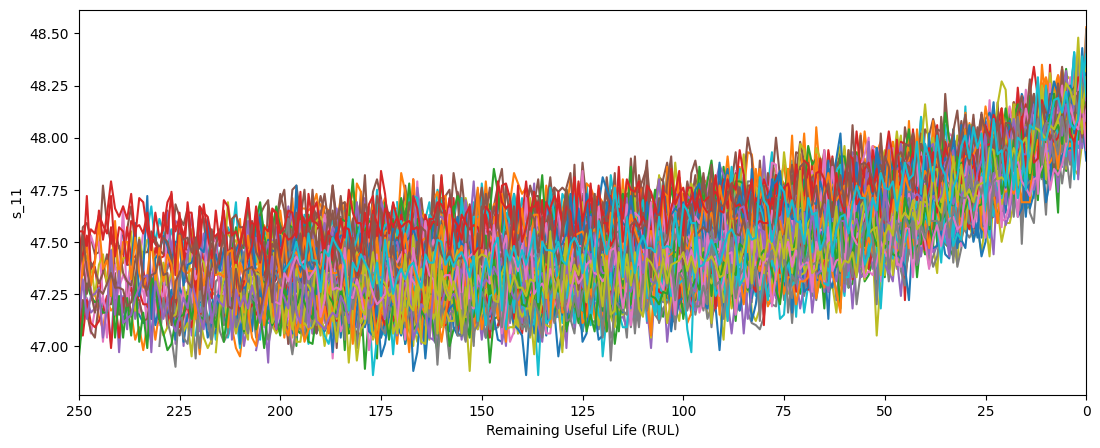

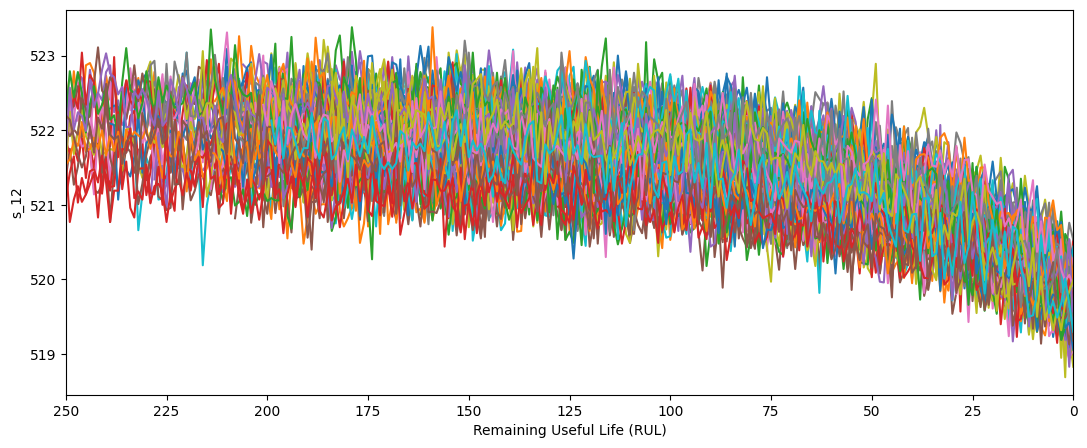

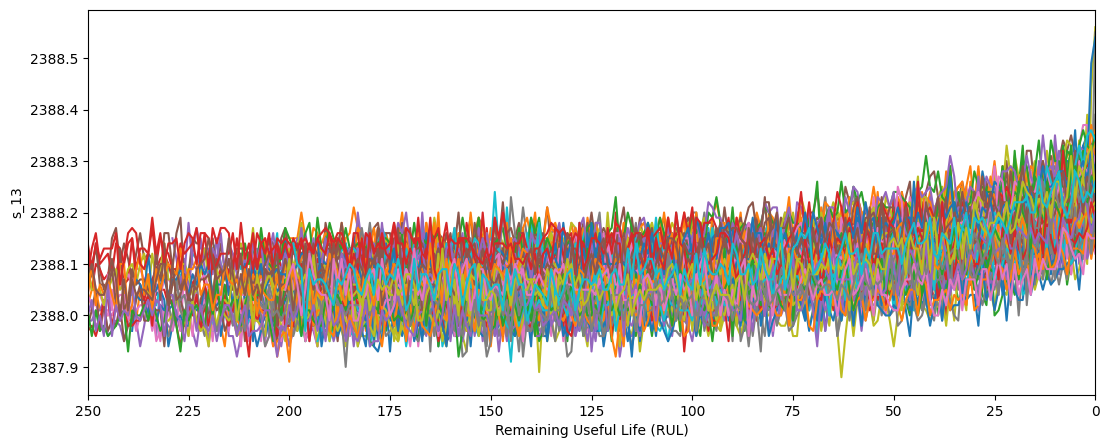

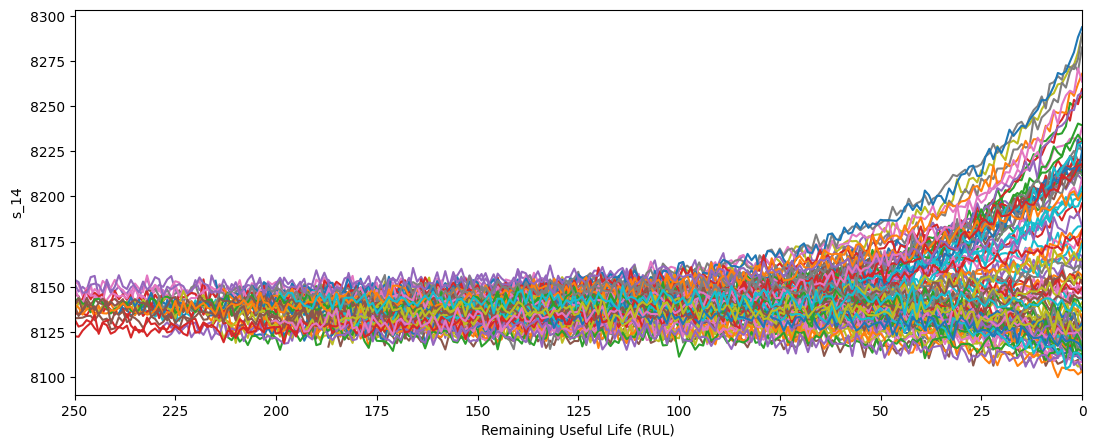

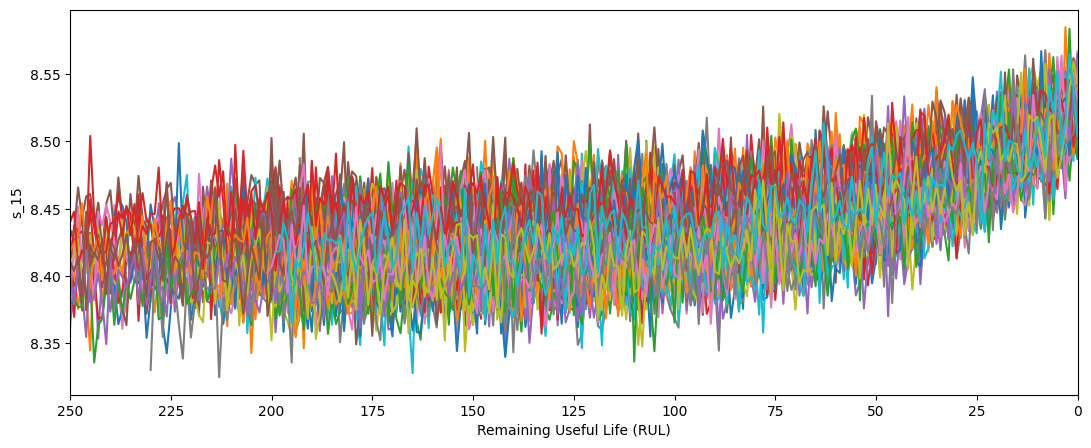

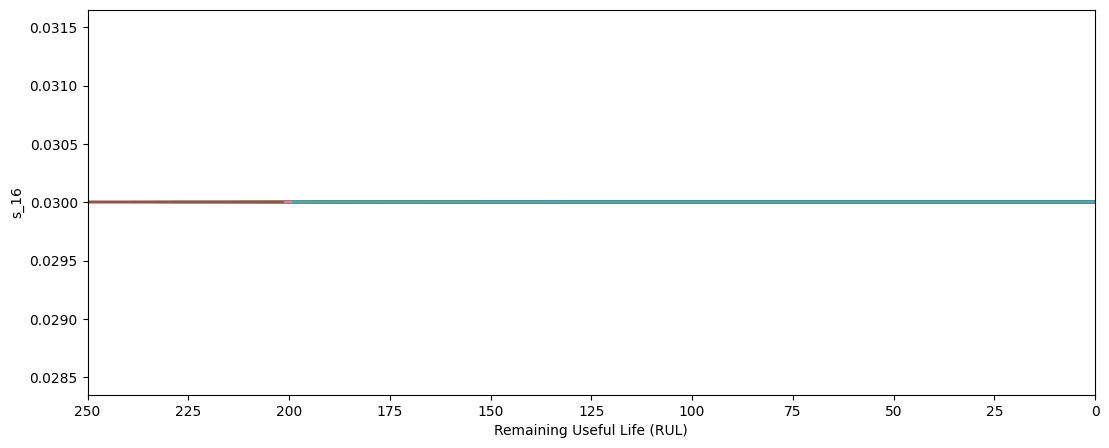

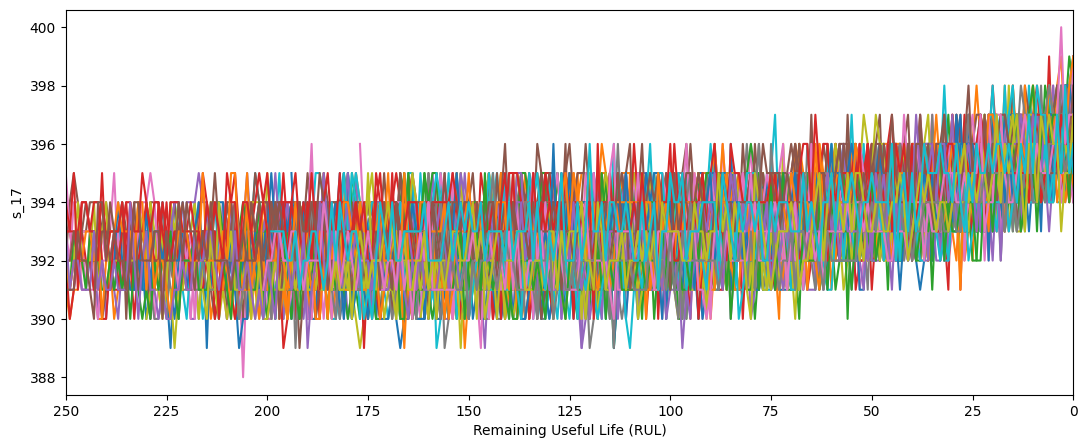

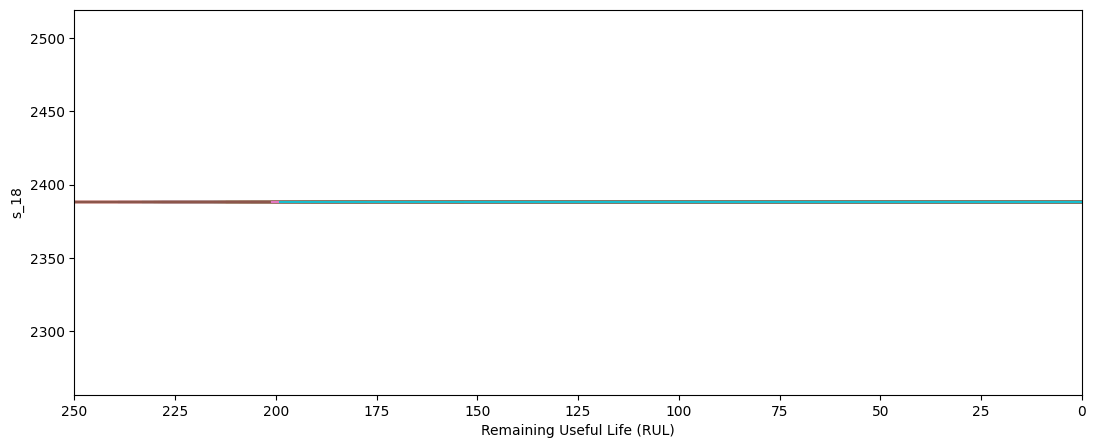

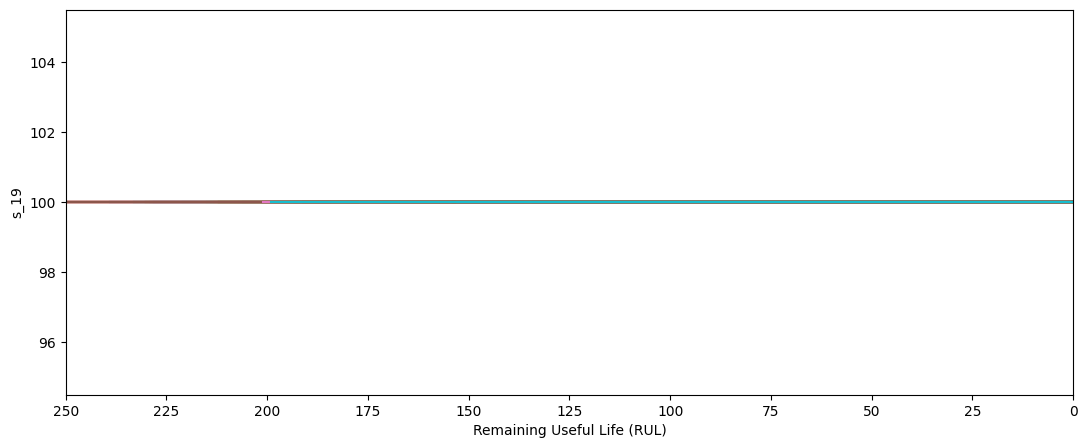

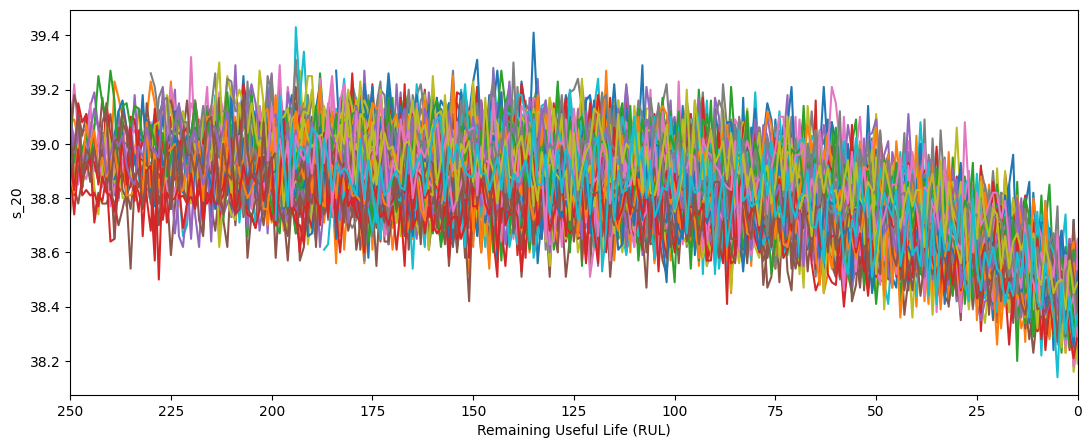

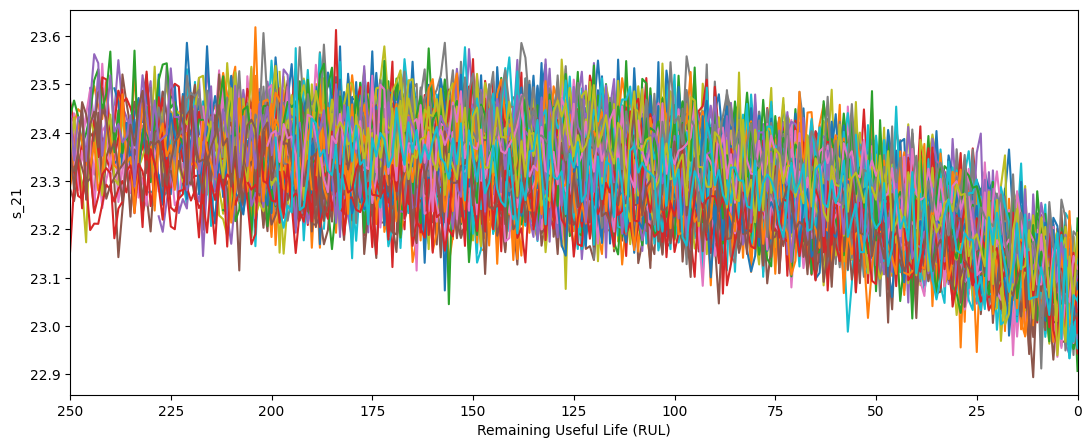

In [12]:
for sensor_name in sensor:
    plot_sensor(sensor_name)

Brief sensor analysis

Looking at all visualisations, it seems as though sensors 1 (included above), 5, 16, 18 and 19 have very little to no information to help predict the RUL. These will be removed before prediction below to help the speed and generalisation of the algorithm. Further testing may reveal that sensors with patterns like sensor 6 (above) should also be removed from the features.

Brief sensors analysis

- sensors 1, 10, 18, and 19 have a similar graph, and a flat line indicates they do not provide any useful information. This concurs with our conclusions from the descriptive statistics.Sensors 5 and 16 also show flat lines, so they should  also be excluded from data 

- There is a rising trend in sensors 2,3,4,8,11,13,15 and 17.
- There is a declining trend in sensors 7,12,20,21


in conclusion, the  Exploratory Data Analysis shows that sensors 1, 5, 6, 10, 16, 18, and 19 do not contain any information that relates to RUL, as their values remain constant over time. Therefore they  will be removed 

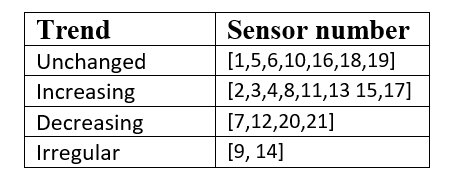
                                   table 2 : a summary of sensors trends 

In [13]:
#Deropping uncceary sanasor and 
drop_sensors = ['s_1','s_5','s_6','s_10','s_16','s_18','s_19']
drop_labels = index_name + operational_setting+drop_sensors

X_train = train.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL')
y_train_1=pd.DataFrame(y_train) 

# Since the true RUL values for the test set are only provided for the last time cycle of each enginge, 
# the test set is subsetted to represent the same
X_test = test.groupby('unit_number').last().reset_index().drop(drop_labels, axis=1)

In [14]:
y_train_1

RUL
0      191
1      190
2      189
3      188
4      187
...    ...
20626    4
20627    3
20628    2
20629    1
20630    0

[20631 rows x 1 columns]

In [15]:
y_test

RUL
0   112
1    98
2    69
3    82
4    91
..  ...
95  137
96   82
97   59
98  117
99   20

[100 rows x 1 columns]

In [16]:
X_train

s_2      s_3      s_4     s_7      s_8      s_9   s_11    s_12  \
0      641.82  1589.70  1400.60  554.36  2388.06  9046.19  47.47  521.66   
1      642.15  1591.82  1403.14  553.75  2388.04  9044.07  47.49  522.28   
2      642.35  1587.99  1404.20  554.26  2388.08  9052.94  47.27  522.42   
3      642.35  1582.79  1401.87  554.45  2388.11  9049.48  47.13  522.86   
4      642.37  1582.85  1406.22  554.00  2388.06  9055.15  47.28  522.19   
...       ...      ...      ...     ...      ...      ...    ...     ...   
20626  643.49  1597.98  1428.63  551.43  2388.19  9065.52  48.07  519.49   
20627  643.54  1604.50  1433.58  550.86  2388.23  9065.11  48.04  519.68   
20628  643.42  1602.46  1428.18  550.94  2388.24  9065.90  48.09  520.01   
20629  643.23  1605.26  1426.53  550.68  2388.25  9073.72  48.39  519.67   
20630  643.85  1600.38  1432.14  550.79  2388.26  9061.48  48.20  519.30   

          s_13     s_14    s_15  s_17   s_20     s_21  
0      2388.02  8138.62  8.4195   392  39.06  23.4190  
1      2388.07  8131.49  8.4318   392  39.00  23.4236  
2      2388.03  8133.23  8.4178   390  38.95  23.3442  
3      2388.08  8133.83  8.3682   392  38.88  23.3739  
4      2388.04  8133.80  8.4294   393  38.90  23.4044  
...        ...      ...     ...   ...    ...      ...  
20626  2388.26  8137.60  8.4956   397  38.49  22.9735  
20627  2388.22  8136.50  8.5139   395  38.30  23.1594  
20628  2388.24  8141.05  8.5646   398  38.44  22.9333  
20629  2388.23  8139.29  8.5389   395  38.29  23.0640  
20630  2388.26  8137.33  8.5036   396  38.37  23.0522  

[20631 rows x 14 columns]

In [17]:
y_train_2=y_train_1.replace(0,1)


In [18]:
y_train_2

RUL
0      191
1      190
2      189
3      188
4      187
...    ...
20626    4
20627    3
20628    2
20629    1
20630    1

[20631 rows x 1 columns]

In [19]:
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [20]:
# create and fit model
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict and evaluate
y_hat_train = lm.predict(X_train)
evaluate(y_train_1, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)


train set RMSE:44.66819159545419, R2:0.579448652779678
test set RMSE:31.952633027740525, R2:0.4087736807657887


In [21]:
import lazypredict

In [22]:
from lazypredict.Supervised import LazyRegressor
#from sklearn import datasets
#from sklearn.utils import shuffle
#import numpy as np

#boston = datasets.load_boston()
#X, y = shuffle(boston.data, boston.target, random_state=13)
#X = X.astype(np.float32)

#offset = int(X.shape[0] * 0.9)

#X_train, y_train = X[:offset], y[:offset]
#X_test, y_test = X[offset:], y[offset:]
X_train_1 = X_train.sample(2000,random_state=3,replace=True)
X_test_1 = X_test.sample(2000,random_state=3,replace=True)
y_train_3 = y_train_1.sample(2000,random_state=3,replace=True)
y_test_1 = y_test.sample(2000,random_state=3,replace=True)

reg = LazyRegressor()
models, predictions = reg.fit(X_train_1, X_test_1, y_train_3, y_test_1)

print(models)

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [01:52<00:00,  2.68s/it]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
SVR                                          0.70       0.70 23.02        0.44
PassiveAggressiveRegressor                   0.66       0.66 24.60        0.01
LinearSVR                                    0.64       0.64 25.13        0.01
NuSVR                                        0.58       0.58 27.27        0.29
HuberRegressor                               0.56       0.57 27.76        0.02
TweedieRegressor                             0.48       0.48 30.38        0.02
ElasticNet                                   0.47       0.48 30.52        0.01
GradientBoostingRegressor                    0.47       0.47 30.56        0.50
ElasticNetCV                                 0.46       0.47 30.84        0.06
BayesianRidge                                0.45       0.46 31.09        0.01
Lasso                                        0.45   

In [23]:
models


Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
SVR                                          0.70       0.70 23.02        0.44
PassiveAggressiveRegressor                   0.66       0.66 24.60        0.01
LinearSVR                                    0.64       0.64 25.13        0.01
NuSVR                                        0.58       0.58 27.27        0.29
HuberRegressor                               0.56       0.57 27.76        0.02
TweedieRegressor                             0.48       0.48 30.38        0.02
ElasticNet                                   0.47       0.48 30.52        0.01
GradientBoostingRegressor                    0.47       0.47 30.56        0.50
ElasticNetCV                                 0.46       0.47 30.84        0.06
BayesianRidge                                0.45       0.46 31.09        0.01
Lasso                                        0.45       0.46 31.09        0.01
LassoCV                                      0.45       0.46 31.10        0.07
LinearRegression                             0.45       0.46 31.10        0.01
TransformedTargetRegressor                   0.45       0.46 31.10        0.02
LarsCV                                       0.45       0.46 31.10        0.03
LassoLarsIC                                  0.45       0.46 31.10        0.01
LassoLarsCV                                  0.45       0.46 31.10        0.02
Lars                                         0.45       0.46 31.10        0.01
Ridge                                        0.45       0.46 31.10        0.01
RidgeCV                                      0.45       0.46 31.10        0.01
SGDRegressor                                 0.44       0.45 31.33        0.01
MLPRegressor                                 0.42       0.43 31.96        0.78
OrthogonalMatchingPursuitCV                  0.40       0.40 32.64        0.02
LGBMRegressor                                0.38       0.38 33.10        0.14
HistGradientBoostingRegressor                0.38       0.38 33.14        0.61
PoissonRegressor                             0.37       0.38 33.29        0.10
RandomForestRegressor                        0.37       0.37 33.40        1.42
ExtraTreesRegressor                          0.34       0.34 34.21        0.57
OrthogonalMatchingPursuit                    0.32       0.32 34.75        0.01
XGBRegressor                                 0.27       0.28 35.84        0.24
BaggingRegressor                             0.24       0.25 36.54        0.13
KNeighborsRegressor                          0.24       0.25 36.54        0.11
GaussianProcessRegressor                     0.08       0.09 40.23        0.36
AdaBoostRegressor                            0.05       0.06 40.99        0.12
RANSACRegressor                             -0.28      -0.27 47.54        0.11
ExtraTreeRegressor                          -0.47      -0.46 50.97        0.02
DecisionTreeRegressor                       -0.53      -0.52 51.97        0.04
QuantileRegressor                           -0.55      -0.54 52.30      106.08
LassoLars                                   -0.58      -0.57 52.81        0.01
DummyRegressor                              -0.65      -0.64 53.93        0.01
KernelRidge                                 -3.75      -3.71 91.56        0.12

In [24]:
X_train

s_2     s_3     s_4    s_7     s_8     s_9  s_11   s_12    s_13  \
0     641.82 1589.70 1400.60 554.36 2388.06 9046.19 47.47 521.66 2388.02   
1     642.15 1591.82 1403.14 553.75 2388.04 9044.07 47.49 522.28 2388.07   
2     642.35 1587.99 1404.20 554.26 2388.08 9052.94 47.27 522.42 2388.03   
3     642.35 1582.79 1401.87 554.45 2388.11 9049.48 47.13 522.86 2388.08   
4     642.37 1582.85 1406.22 554.00 2388.06 9055.15 47.28 522.19 2388.04   
...      ...     ...     ...    ...     ...     ...   ...    ...     ...   
20626 643.49 1597.98 1428.63 551.43 2388.19 9065.52 48.07 519.49 2388.26   
20627 643.54 1604.50 1433.58 550.86 2388.23 9065.11 48.04 519.68 2388.22   
20628 643.42 1602.46 1428.18 550.94 2388.24 9065.90 48.09 520.01 2388.24   
20629 643.23 1605.26 1426.53 550.68 2388.25 9073.72 48.39 519.67 2388.23   
20630 643.85 1600.38 1432.14 550.79 2388.26 9061.48 48.20 519.30 2388.26   

         s_14  s_15  s_17  s_20  s_21  
0     8138.62  8.42   392 39.06 23.42  
1     8131.49  8.43   392 39.00 23.42  
2     8133.23  8.42   390 38.95 23.34  
3     8133.83  8.37   392 38.88 23.37  
4     8133.80  8.43   393 38.90 23.40  
...       ...   ...   ...   ...   ...  
20626 8137.60  8.50   397 38.49 22.97  
20627 8136.50  8.51   395 38.30 23.16  
20628 8141.05  8.56   398 38.44 22.93  
20629 8139.29  8.54   395 38.29 23.06  
20630 8137.33  8.50   396 38.37 23.05  

[20631 rows x 14 columns]

In [25]:
X_train_1 = np.array(X_train)